<a href="https://colab.research.google.com/github/anilkamat/DCRNN_brain_connectivity/blob/main/Copy_of_dcrnn_for_brain_connectivity_colab_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Demo version for Google Colab

Select GPU acceleration: Navigate to Edit → Notebook Settings → Hardware Accelerator: GPU 

In [2]:
%tensorflow_version 1.x  # Select tensorflow 1.15
import tensorflow as tf
print('\nTensorflow version: {} \n'.format(tf.__version__))

save_in_gdrive = False   # Set to True to save results to Google drive.
# Mount google drive directory.
if save_in_gdrive == True:
    from google.colab import drive                     
    drive.mount('/content/drive', force_remount=True)  
    %cd /content/drive/'My Drive'/'Colab Notebooks'    

!pwd
# Clone repository.
!git clone https://github.com/anilkamat/DCRNN_brain_connectivity.git
#https://github.com/simonvino/DCRNN_brain_connectivity.git
%cd ./DCRNN_brain_connectivity/ 

# Select GPU: navigate to Edit → Notebook Settings → Hardware Accelerator: select GPU  
!nvidia-smi  # Check if GPU is used.

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x  # Select tensorflow 1.15`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.

Tensorflow version: 1.15.2 

/content
Cloning into 'DCRNN_brain_connectivity'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 110 (delta 34), reused 99 (delta 30), pack-reused 0
Receiving objects: 100% (110/110), 11.29 MiB | 25.81 MiB/s, done.
Resolving deltas: 100% (34/34), done.
/content/DCRNN_brain_connectivity
/bin/bash: nvidia-smi: command not found


In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#SC = np.load('./MRI_data/SC_matrix/artificial_SC_matrix.npy')
SC = np.load('./MRI_data/SC_matrix/SC.npy')

In [50]:
np.shape(SC)


(46, 46)

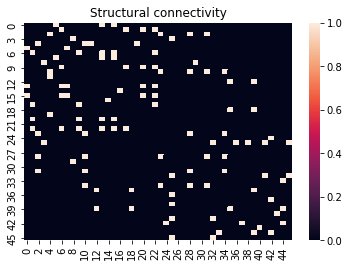

In [51]:

ax = sns.heatmap(SC, vmin=0, vmax=1)
plt.title('Structural connectivity')
plt.show()

### Generate training data samples

In [52]:
!python generate_samples.py --input_dir=./MRI_data/fMRI_sessions/ --output_dir=./MRI_data/training_samples

Generating training data.
Load: ./MRI_data/fMRI_sessions//session_1/ET1.csv
Load: ./MRI_data/fMRI_sessions//session_1/ET2.csv
Load: ./MRI_data/fMRI_sessions//session_1/ET3.csv
Load: ./MRI_data/fMRI_sessions//session_1/ET4.csv
Load: ./MRI_data/fMRI_sessions//session_1/ET5.csv
Load: ./MRI_data/fMRI_sessions//session_1/ET6.csv
Load: ./MRI_data/fMRI_sessions//session_1/ET7.csv
Load: ./MRI_data/fMRI_sessions//session_1/ET8.csv
### SAMPLES ###
Using 1 sessions from 8 subjects.
Per session:   459 training samples,    58 validation samples,    57 testing samples.
In total:     4074 training samples,   509 validation samples,   510 testing samples.
### SAVE DATA ###
Save in: ./MRI_data/training_samples
train x:  (4074, 30, 46, 1) y: (4074, 30, 46, 1)
val x:  (509, 30, 46, 1) y: (509, 30, 46, 1)
test x:  (510, 30, 46, 1) y: (510, 30, 46, 1)
Done.


### Train model

In [53]:
f = open('/content/DCRNN_brain_connectivity/MRI_data/fMRI_sessions/session_1/artificial_timeseries_sub_1.txt','r')

FileNotFoundError: ignored

In [54]:
sig_s1 = np.loadtxt('/content/DCRNN_brain_connectivity/MRI_data/fMRI_sessions/session_1/ET1.csv', dtype= float,delimiter=',')
SC = np.loadtxt('/content/DCRNN_brain_connectivity/MRI_data/SC_matrix/SC.csv', dtype= float,delimiter=',')

In [55]:
print(np.shape(sig_s1))
print(np.shape(SC))
np.save('/content/DCRNN_brain_connectivity/MRI_data/SC_matrix/SC.npy',SC)

(46, 446)
(46, 46)


In [12]:
!pwd

/content/DCRNN_brain_connectivity


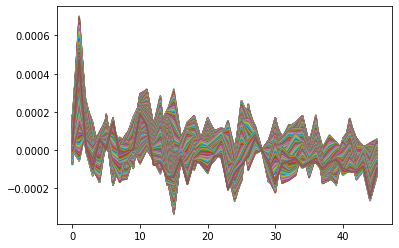

In [56]:
plt.plot(sig_s1)
plt.show()

In [58]:
# Train model.
!python dcrnn_for_brain_connectivity_train.py --config_filename=./configs/dcrnn_demo_config.yaml --save_predictions=True

2022-02-22 05:58:24.384079: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2022-02-22 05:58:24.384351: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55b559f27b80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-02-22 05:58:24.384393: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-02-22 05:58:24.386607: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-02-22 05:58:24.398235: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-02-22 05:58:24.398311: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (2a3601419f4e): /proc/driver/nvidia/version does not exist
2022-02-22 05:58:24,399 - INFO - Log directory: ./results

In [61]:
!zip -r /content/Results_file.zip /content/DCRNN_brain_connectivity/results
from google.colab import files
files.download("/content/Results_file.zip")

  adding: content/DCRNN_brain_connectivity/results/ (stored 0%)
  adding: content/DCRNN_brain_connectivity/results/dcrnn_R_2_h_30_64-64_lr_0.1_bs_32_0222055824/ (stored 0%)
  adding: content/DCRNN_brain_connectivity/results/dcrnn_R_2_h_30_64-64_lr_0.1_bs_32_0222055824/models-0.1030-128.data-00000-of-00001 (deflated 7%)
  adding: content/DCRNN_brain_connectivity/results/dcrnn_R_2_h_30_64-64_lr_0.1_bs_32_0222055824/models-0.1030-128.index (deflated 56%)
  adding: content/DCRNN_brain_connectivity/results/dcrnn_R_2_h_30_64-64_lr_0.1_bs_32_0222055824/config_0.yaml (deflated 48%)
  adding: content/DCRNN_brain_connectivity/results/dcrnn_R_2_h_30_64-64_lr_0.1_bs_32_0222055824/outputs.npz (deflated 12%)
  adding: content/DCRNN_brain_connectivity/results/dcrnn_R_2_h_30_64-64_lr_0.1_bs_32_0222055824/checkpoint (deflated 42%)
  adding: content/DCRNN_brain_connectivity/results/dcrnn_R_2_h_30_64-64_lr_0.1_bs_32_0222055824/DCRNN_predictions_test_sample_0_ROI1-15_outputs.png (deflated 7%)
  adding: co

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>